In [1]:
# tables
import pandas as pd
import numpy as np
# graphics
import seaborn as sns
import matplotlib.pyplot as plt

#Preprocecing
from nltk.corpus import stopwords
import nltk
import collections
import re
from bs4 import BeautifulSoup

#LDA
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation as LDA

#gensim
import gensim.corpora as corpora
from gensim.models import CoherenceModel
import gensim

#essai
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.cm as cm
from sklearn.cluster import MiniBatchKMeans

#Supervisée
from sklearn.datasets import make_multilabel_classification
from sklearn.multioutput import MultiOutputClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import train_test_split

from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import MultiLabelBinarizer

#models
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import Perceptron, LogisticRegression, SGDClassifier

#metrics
from sklearn.metrics import hamming_loss,accuracy_score, classification_report,jaccard_score,f1_score

#GridSearchCV
from time import time
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

import pyLDAvis
import pyLDAvis.gensim_models
import pyLDAvis.sklearn
pyLDAvis.enable_notebook()

#On ignore les DeprecationWarning car un souci lié à pyLDAvis en affiche beaucoup 
#mais mon mentor et moi meme n'avons pas réussi à résoudre le problème.
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

# Score > 80

In [2]:
df=pd.read_csv("QueryResults_1.csv", sep=',',encoding = 'UTF-8')
df=df.append(pd.read_csv("QueryResults_2.csv", sep=',',encoding = 'UTF-8'),ignore_index = True)

In [3]:
df

,Id,Body,Title,Tags
0,4,<p>I want to use a <code>Track-Bar</code> to c...,How to convert a Decimal to a Double in C#?,<c#><floating-point><type-conversion><double><...
1,6,<p>I have an absolutely positioned <code>div</...,Why did the width collapse in the percentage w...,<html><css><internet-explorer-7>
2,9,<p>Given a <code>DateTime</code> representing ...,How do I calculate someone's age based on a Da...,<c#><.net><datetime>
3,11,<p>Given a specific <code>DateTime</code> valu...,Calculate relative time in C#,<c#><datetime><time><datediff><relative-time-s...
4,13,<p>Is there a standard way for a web server to...,Determine a user's timezone,<html><browser><timezone><user-agent><timezone...
...,...,...,...,...
58898,60573595,<p>Every time I try <code>npm install</code>. ...,`npm install` fails on node-gyp rebuild with `...,<node.js><npm><terminal><macos-catalina><node-...
58899,60625906,"<p>I am reading a book (<a href=""https://smile...",Why cast free's return value to void?,<c><casting><free><void><legacy-code>
58900,62950667,<p>We're currently migrating from Java 8 to Ja...,Is there any need to switch to modules when mi...,<java><java-11><java-platform-module-system>
58901,62969917,"<p>All of a sudden, I am getting this build er...","How to fix ""unexpected element <queries> found...",<android><android-gradle-plugin><android-manif...


In [4]:
print("Body")
print(df.Body.shape)
print(df.Body.drop_duplicates().shape)
print("Title")
print(df.Title.shape)
print(df.Title.drop_duplicates().shape)
print("Tags")
print(df.Tags.shape)
print(df.Tags.drop_duplicates().shape)

Body
(58903,)
(58903,)
Title
(58903,)
(58898,)
Tags
(58903,)
(41457,)


In [5]:
df.shape

(58903, 4)

In [6]:
df=df.drop(['Id'],axis=1).drop_duplicates()

In [7]:
df.shape

(58903, 3)

# Prétraitement

### Fonctions

In [8]:
#fontion de 'tokenization' pour df.Title et df.Body
def token(text):
    text=re.sub('[^a-zA-Z0-9#+]', ' ',BeautifulSoup(text, "lxml").get_text() ).lower().split()
    return text

In [9]:
stop = stopwords.words('english')

In [10]:
#fontion pour le 'stemming' et le suppression des stopwords pour df.Title et df.Body
sno = nltk.stem.SnowballStemmer('english')
def stemmer(s):
    s = [sno.stem(word) for word in s if word not in (stop)]
    return s

## Body

In [11]:
df.Body.iloc[0]

'<p>I want to use a <code>Track-Bar</code> to change a <code>Form</code>\'s opacity.</p>\n<p>This is my code:</p>\n<pre class="lang-cs prettyprint-override"><code>decimal trans = trackBar1.Value / 5000;\nthis.Opacity = trans;\n</code></pre>\n<p>When I build the application, it gives the following error:</p>\n<blockquote>\n<pre class="lang-none prettyprint-override"><code>Cannot implicitly convert type decimal to double\n</code></pre>\n</blockquote>\n<p>I have tried using <code>trans</code> and <code>double</code>, but then the <code>Control</code> doesn\'t work. This code worked fine in a past VB.NET project.</p>\n'

In [12]:
df.Body=df.Body.map(token)

In [13]:
df.Body

0        [i, want, to, use, a, track, bar, to, change, ...
1        [i, have, an, absolutely, positioned, div, con...
2        [given, a, datetime, representing, a, person, ...
3        [given, a, specific, datetime, value, how, do,...
4        [is, there, a, standard, way, for, a, web, ser...
                               ...                        
58898    [every, time, i, try, npm, install, i, get, th...
58899    [i, am, reading, a, book, programming, with, p...
58900    [we, re, currently, migrating, from, java, 8, ...
58901    [all, of, a, sudden, i, am, getting, this, bui...
58902    [i, have, a, fairly, complex, maths, library, ...
Name: Body, Length: 58903, dtype: object

In [14]:
df.Body=df.Body.apply(stemmer)

In [15]:
df.Body

0        [want, use, track, bar, chang, form, opac, cod...
1        [absolut, posit, div, contain, sever, children...
2        [given, datetim, repres, person, birthday, cal...
3        [given, specif, datetim, valu, display, relat,...
4        [standard, way, web, server, abl, determin, us...
                               ...                        
58898    [everi, time, tri, npm, instal, get, follow, e...
58899    [read, book, program, posix, thread, butenhof,...
58900    [current, migrat, java, 8, java, 11, howev, up...
58901    [sudden, get, build, error, android, project, ...
58902    [fair, complex, math, librari, work, discov, n...
Name: Body, Length: 58903, dtype: object

## Title

In [16]:
df=df.drop_duplicates(subset=['Title'])

In [17]:
df

,Body,Title,Tags
0,"[want, use, track, bar, chang, form, opac, cod...",How to convert a Decimal to a Double in C#?,<c#><floating-point><type-conversion><double><...
1,"[absolut, posit, div, contain, sever, children...",Why did the width collapse in the percentage w...,<html><css><internet-explorer-7>
2,"[given, datetim, repres, person, birthday, cal...",How do I calculate someone's age based on a Da...,<c#><.net><datetime>
3,"[given, specif, datetim, valu, display, relat,...",Calculate relative time in C#,<c#><datetime><time><datediff><relative-time-s...
4,"[standard, way, web, server, abl, determin, us...",Determine a user's timezone,<html><browser><timezone><user-agent><timezone...
...,...,...,...
58898,"[everi, time, tri, npm, instal, get, follow, e...",`npm install` fails on node-gyp rebuild with `...,<node.js><npm><terminal><macos-catalina><node-...
58899,"[read, book, program, posix, thread, butenhof,...",Why cast free's return value to void?,<c><casting><free><void><legacy-code>
58900,"[current, migrat, java, 8, java, 11, howev, up...",Is there any need to switch to modules when mi...,<java><java-11><java-platform-module-system>
58901,"[sudden, get, build, error, android, project, ...","How to fix ""unexpected element <queries> found...",<android><android-gradle-plugin><android-manif...


In [18]:
df.Title.iloc[0]

'How to convert a Decimal to a Double in C#?'

In [19]:
df.Title

0              How to convert a Decimal to a Double in C#?
1        Why did the width collapse in the percentage w...
2        How do I calculate someone's age based on a Da...
3                            Calculate relative time in C#
4                              Determine a user's timezone
                               ...                        
58898    `npm install` fails on node-gyp rebuild with `...
58899                Why cast free's return value to void?
58900    Is there any need to switch to modules when mi...
58901    How to fix "unexpected element <queries> found...
58902    How can I make my class immune to the "auto va...
Name: Title, Length: 58898, dtype: object

In [20]:
df.Title=df.Title.map(token)

In [21]:
df.Title

0        [how, to, convert, a, decimal, to, a, double, ...
1        [why, did, the, width, collapse, in, the, perc...
2        [how, do, i, calculate, someone, s, age, based...
3                      [calculate, relative, time, in, c#]
4                        [determine, a, user, s, timezone]
                               ...                        
58898    [npm, install, fails, on, node, gyp, rebuild, ...
58899        [why, cast, free, s, return, value, to, void]
58900    [is, there, any, need, to, switch, to, modules...
58901    [how, to, fix, unexpected, element, found, in,...
58902    [how, can, i, make, my, class, immune, to, the...
Name: Title, Length: 58898, dtype: object

In [22]:
df.Title=df.Title.apply(stemmer)

In [23]:
df.Title

0                              [convert, decim, doubl, c#]
1        [width, collaps, percentag, width, child, elem...
2        [calcul, someon, age, base, datetim, type, bir...
3                                [calcul, relat, time, c#]
4                                [determin, user, timezon]
                               ...                        
58898    [npm, instal, fail, node, gyp, rebuild, gyp, x...
58899                     [cast, free, return, valu, void]
58900    [need, switch, modul, migrat, java, 9+, java, 11]
58901               [fix, unexpect, element, found, error]
58902    [make, class, immun, auto, valu, copi, proxi, ...
Name: Title, Length: 58898, dtype: object

## Tags

In [24]:
df.Tags.iloc[0]

'<c#><floating-point><type-conversion><double><decimal>'

In [25]:
df.Tags=df["Tags"].map(lambda field:field[1:-1].split('><'))

In [26]:
df.Tags

0        [c#, floating-point, type-conversion, double, ...
1                         [html, css, internet-explorer-7]
2                                     [c#, .net, datetime]
3        [c#, datetime, time, datediff, relative-time-s...
4        [html, browser, timezone, user-agent, timezone...
                               ...                        
58898    [node.js, npm, terminal, macos-catalina, node-...
58899                [c, casting, free, void, legacy-code]
58900         [java, java-11, java-platform-module-system]
58901    [android, android-gradle-plugin, android-manif...
58902                               [c++, copy-assignment]
Name: Tags, Length: 58898, dtype: object

In [27]:
df

,Body,Title,Tags
0,"[want, use, track, bar, chang, form, opac, cod...","[convert, decim, doubl, c#]","[c#, floating-point, type-conversion, double, ..."
1,"[absolut, posit, div, contain, sever, children...","[width, collaps, percentag, width, child, elem...","[html, css, internet-explorer-7]"
2,"[given, datetim, repres, person, birthday, cal...","[calcul, someon, age, base, datetim, type, bir...","[c#, .net, datetime]"
3,"[given, specif, datetim, valu, display, relat,...","[calcul, relat, time, c#]","[c#, datetime, time, datediff, relative-time-s..."
4,"[standard, way, web, server, abl, determin, us...","[determin, user, timezon]","[html, browser, timezone, user-agent, timezone..."
...,...,...,...
58898,"[everi, time, tri, npm, instal, get, follow, e...","[npm, instal, fail, node, gyp, rebuild, gyp, x...","[node.js, npm, terminal, macos-catalina, node-..."
58899,"[read, book, program, posix, thread, butenhof,...","[cast, free, return, valu, void]","[c, casting, free, void, legacy-code]"
58900,"[current, migrat, java, 8, java, 11, howev, up...","[need, switch, modul, migrat, java, 9+, java, 11]","[java, java-11, java-platform-module-system]"
58901,"[sudden, get, build, error, android, project, ...","[fix, unexpect, element, found, error]","[android, android-gradle-plugin, android-manif..."


# Analyse et gestion des tags

C:\Users\thiba\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


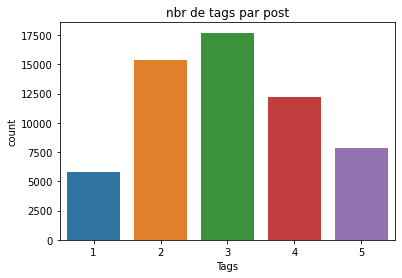

In [28]:
sns.countplot(df.Tags.map(lambda field:len(field)))
plt.title("nbr de tags par post")
plt.show()

In [29]:
all_tags=[]
for i in df.Tags:
    for j in i:
        all_tags.append(j)

C:\Users\thiba\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


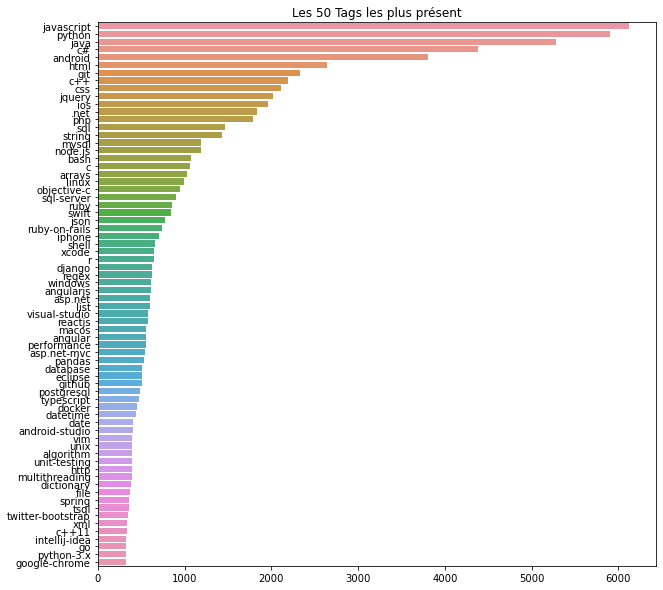

In [30]:
#Affichage des 20 Tags les plus présent
counter=collections.Counter(all_tags)
common = counter.most_common(70)
labels = [item[0] for item in common]
number = [item[1] for item in common]

plt.figure(figsize=(10,10))
sns.barplot(number, labels)
plt.title("Les 50 Tags les plus présent")
plt.show()

In [31]:
liste=[]
for i in range(0,len(labels)):
    if number[i]>500:
        liste.append(labels[i])    

In [32]:
len(liste)

47

In [33]:
def tags_to_keep(list):
    list = [x for x in list if x in labels[:50]]
    return list

In [34]:
df.Tags=df.Tags.apply(tags_to_keep)

In [35]:
df=df.reset_index()
df=df.drop(['index'],axis=1)

In [36]:
index_to_drop=[]
for i in range(0,len(df)-1):
    if len(df.Tags[i])==0:
        index_to_drop.append(i)

In [37]:
df.Tags=df.Tags.drop(index=index_to_drop,axis=0)

In [38]:
df=df.dropna()

C:\Users\thiba\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


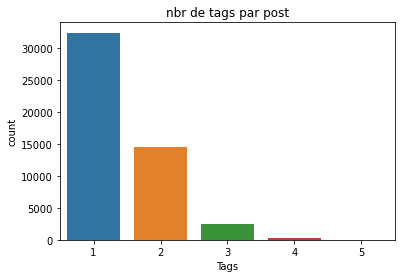

In [39]:
sns.countplot(df.Tags.map(lambda field:len(field)))
plt.title("nbr de tags par post")
plt.show()

In [40]:
df

,Body,Title,Tags
0,"[want, use, track, bar, chang, form, opac, cod...","[convert, decim, doubl, c#]",[c#]
1,"[absolut, posit, div, contain, sever, children...","[width, collaps, percentag, width, child, elem...","[html, css]"
2,"[given, datetim, repres, person, birthday, cal...","[calcul, someon, age, base, datetim, type, bir...","[c#, .net]"
3,"[given, specif, datetim, valu, display, relat,...","[calcul, relat, time, c#]",[c#]
4,"[standard, way, web, server, abl, determin, us...","[determin, user, timezon]",[html]
...,...,...,...
58893,"[everi, time, tri, npm, instal, get, follow, e...","[npm, instal, fail, node, gyp, rebuild, gyp, x...",[node.js]
58894,"[read, book, program, posix, thread, butenhof,...","[cast, free, return, valu, void]",[c]
58895,"[current, migrat, java, 8, java, 11, howev, up...","[need, switch, modul, migrat, java, 9+, java, 11]",[java]
58896,"[sudden, get, build, error, android, project, ...","[fix, unexpect, element, found, error]",[android]


# Mettre en œuvre une approche non supervisée.

In [41]:
df["Document"] = (df.Title + df.Body)

In [42]:
df=df.drop(["Title", "Body"], axis=1)

In [43]:
df

,Tags,Document
0,[c#],"[convert, decim, doubl, c#, want, use, track, ..."
1,"[html, css]","[width, collaps, percentag, width, child, elem..."
2,"[c#, .net]","[calcul, someon, age, base, datetim, type, bir..."
3,[c#],"[calcul, relat, time, c#, given, specif, datet..."
4,[html],"[determin, user, timezon, standard, way, web, ..."
...,...,...
58893,[node.js],"[npm, instal, fail, node, gyp, rebuild, gyp, x..."
58894,[c],"[cast, free, return, valu, void, read, book, p..."
58895,[java],"[need, switch, modul, migrat, java, 9+, java, ..."
58896,[android],"[fix, unexpect, element, found, error, sudden,..."


# LDA

In [44]:
tfidf_vectorizer = TfidfVectorizer(
    min_df=3,
    max_df=0.85,
    max_features=5000,
    ngram_range=(1, 2),
    preprocessor=' '.join
)
tfidf = tfidf_vectorizer.fit_transform(df.Document)

In [45]:
from sklearn.decomposition import LatentDirichletAllocation

In [46]:
lda =  LatentDirichletAllocation(n_components = 4)

In [47]:
lda.fit(tfidf)

LatentDirichletAllocation(n_components=4)

In [48]:
lda.perplexity(tfidf)

3182.7945959990334

In [49]:
lda.score(tfidf)

-1854681.7097815194

In [50]:
pyLDAvis.sklearn.prepare(lda,tfidf,tfidf_vectorizer)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3      0.112092  0.117677       1        1  33.013243
1      0.038231 -0.144208       2        1  27.154579
0     -0.193858  0.037206       3        1  20.450578
2      0.043535 -0.010675       4        1  19.381601, topic_info=         Term         Freq        Total Category  logprob  loglift
1547     file  1119.000000  1119.000000  Default  30.0000  30.0000
1243      div   488.000000   488.000000  Default  29.0000  29.0000
4049   string  1005.000000  1005.000000  Default  28.0000  28.0000
1818      git   626.000000   626.000000  Default  27.0000  27.0000
305   android   661.000000   661.000000  Default  26.0000  26.0000
...       ...          ...          ...      ...      ...      ...
1818      git   171.881967   626.406856   Topic4  -5.5580   0.3477
3596   return   166.347318   580.593753   Topic4  -5.5907   0.3909
2431     like   164.936013   817.308049   Topic4  -5.5992   0.0404
4756     want   161.317086   722.868697   Topic4  -5.6214   0.1410
4432     type   149.985030   555.898963   Topic4  -5.6942   0.3308

[329 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
223       2  0.975880      adb
253       2  0.010032     ajax
253       3  0.190609     ajax
253       4  0.792532     ajax
305       1  0.003025  android
...     ...       ...      ...
4905      2  0.226259    would
4905      3  0.173793    would
4905      4  0.154119    would
4951      2  0.982955      x86
4955      2  0.994210    xcode

[653 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 2, 1, 3])

In [51]:
def plot_tsne_pca(data, labels):
    max_label = max(labels)
    max_items = np.random.choice(range(data.shape[0]), size=3000, replace=False)
    
    pca = PCA(n_components=2).fit_transform(data[max_items,:].todense())
    tsne = TSNE().fit_transform(PCA(n_components=50).fit_transform(data[max_items,:].todense()))
    
    
    idx = np.random.choice(range(pca.shape[0]), size=300, replace=False)
    label_subset = labels[max_items]
    label_subset = [cm.hsv(i/max_label) for i in label_subset[idx]]
    
    fig, ax = plt.subplots(1, 2, figsize=(15, 5))
    
    ax[0].scatter(pca[idx, 0], pca[idx, 1], c=label_subset)
    ax[0].set_title('PCA Cluster Plot')
    
    ax[1].scatter(tsne[idx, 0], tsne[idx, 1], c=label_subset)
    ax[1].set_title('TSNE Cluster Plot')

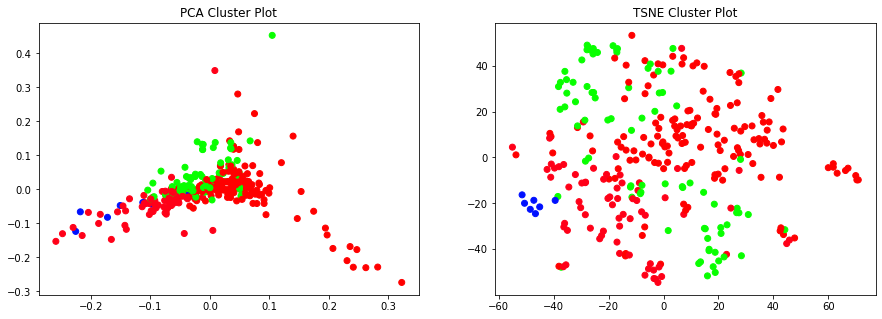

In [52]:
clusters = MiniBatchKMeans(n_clusters=4, random_state=20).fit_predict(tfidf)
plot_tsne_pca(tfidf, clusters)

In [53]:
def print_topics(model, count_vectorizer, n_top_words):
    words = count_vectorizer.get_feature_names()
    for topic_idx, topic in enumerate(model.components_):
        print("\nTopic #%d:" % topic_idx)
        print(" ".join([words[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))

number_topics = 4
number_words = 10

lda = LDA(n_components=number_topics, n_jobs=-1)
lda.fit(tfidf)

print("Topics found via LDA:")
print_topics(lda, tfidf_vectorizer, number_words)

Topics found via LDA:

Topic #0:
div jqueri html class button text javascript function use element

Topic #1:
file git command instal run android directori use commit project

Topic #2:
use class code function tabl method differ error object type

Topic #3:
string array list date android convert valu number python charact


In [54]:
# utiliser scipy pour transformer la matrice
# savoir quelle ligne se retrouve dans quel topic 

### SKLearn

In [55]:
dict={}
for i in [2,4,6,10]:
    #,4,6,10,12
    lda =  LatentDirichletAllocation(n_components = i).fit(tfidf)
    perp=lda.perplexity(tfidf)
    dict[i]=perp

In [56]:
dict

{2: 2666.067286171744,
 4: 3270.15076081878,
 6: 3579.9896041297206,
 10: 4127.898384313441}

### Ou avec Gensim

In [57]:
id2word = corpora.Dictionary(df.Document)

texts = df.Document

corpus = [id2word.doc2bow(text) for text in texts]

In [58]:
dict={}
for i in  np.arange(2,10,2) :
    lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=i, 
                                       random_state=100,
                                       chunksize=100,
                                       passes=10,
                                       per_word_topics=True)
    # Compute Coherence Score
    coherence_model_lda = CoherenceModel(model=lda_model, texts=df.Document, dictionary=id2word, coherence='c_v')
    coherence_lda = coherence_model_lda.get_coherence()
    dict[i]=coherence_lda
    print('Coherence Score: ', coherence_lda)

Coherence Score:  0.45932884986082945
Coherence Score:  0.5338326854621941
Coherence Score:  0.569971504513926
Coherence Score:  0.5972440392188156


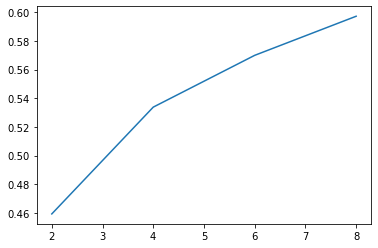

In [59]:
plt.plot(*zip(*sorted(dict.items())))
plt.show()

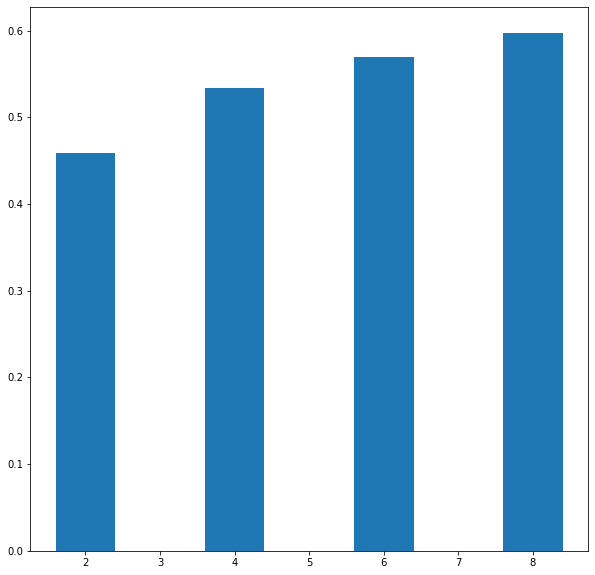

In [60]:
keys = dict.keys()
values = dict.values()

plt.figure(figsize=(10,10))
plt.bar(keys, values)
plt.show()

In [61]:
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=8, 
                                       random_state=100,
                                       chunksize=100,
                                       passes=10,
                                       per_word_topics=True)

In [62]:
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word)

In [63]:
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
6     -0.130681  0.050755       1        1  18.921866
7      0.091324  0.125772       2        1  14.846645
0     -0.010662  0.001690       3        1  13.371529
2     -0.095584 -0.080452       4        1  13.216224
4     -0.122787  0.050974       5        1  12.131463
1      0.369914  0.043483       6        1  10.886706
5      0.021398 -0.318597       7        1   9.530644
3     -0.122921  0.126374       8        1   7.094922, topic_info=         Term          Freq         Total Category  logprob  loglift
4131  android  25478.000000  25478.000000  Default  30.0000  30.0000
32          0  35894.000000  35894.000000  Default  29.0000  29.0000
155         1  32954.000000  32954.000000  Default  28.0000  28.0000
293      file  23428.000000  23428.000000  Default  27.0000  27.0000
92     string  19239.000000  19239.000000  Default  26.0000  26.0000
...       ...           ...           ...      ...      ...      ...
25        tri   1794.345634  17089.622200   Topic8  -4.9809   0.3920
202       get   1741.853558  22889.996487   Topic8  -5.0106   0.0700
123       new   1501.797010  16041.780987   Topic8  -5.1589   0.2773
284     creat   1420.649501  10666.685568   Topic8  -5.2144   0.6298
79       like   1433.096626  20379.649127   Topic8  -5.2057  -0.0089

[598 rows x 6 columns], token_table=       Topic      Freq        Term
term                              
147        1  0.025286           #
147        2  0.011450           #
147        4  0.096371           #
147        6  0.320125           #
147        8  0.546582           #
...      ...       ...         ...
262        2  0.999437         x86
2586       2  0.962773       xcode
2586       7  0.036550       xcode
7153       8  0.998950          xx
11292      7  0.998611  zygoteinit

[1513 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[7, 8, 1, 3, 5, 2, 6, 4])

# Utiliser une approche supervisée

In [64]:
df=df.reset_index()
df=df.drop(['index'],axis=1)

In [65]:
X = df["Document"].apply(lambda x: ' '.join(x))
y = df["Tags"]

In [66]:
all_tags=[]
for i in df.Tags:
    for j in i:
        all_tags.append(j)

In [67]:
multilabel_binarizer = MultiLabelBinarizer()
y = multilabel_binarizer.fit_transform(y)

In [68]:
tfidf_vectorizer = TfidfVectorizer(
    max_df=.8,
    min_df=5,
    max_features=20000,
    ngram_range=(1, 1)
)
X= tfidf_vectorizer.fit_transform(X)

In [69]:
df

,Tags,Document
0,[c#],"[convert, decim, doubl, c#, want, use, track, ..."
1,"[html, css]","[width, collaps, percentag, width, child, elem..."
2,"[c#, .net]","[calcul, someon, age, base, datetim, type, bir..."
3,[c#],"[calcul, relat, time, c#, given, specif, datet..."
4,[html],"[determin, user, timezon, standard, way, web, ..."
...,...,...
49761,[node.js],"[npm, instal, fail, node, gyp, rebuild, gyp, x..."
49762,[c],"[cast, free, return, valu, void, read, book, p..."
49763,[java],"[need, switch, modul, migrat, java, 9+, java, ..."
49764,[android],"[fix, unexpect, element, found, error, sudden,..."


In [70]:
multilabel_binarizer.classes_

array(['.net', 'android', 'angular', 'angularjs', 'arrays', 'asp.net',
       'asp.net-mvc', 'bash', 'c', 'c#', 'c++', 'css', 'database',
       'django', 'docker', 'eclipse', 'git', 'github', 'html', 'ios',
       'iphone', 'java', 'javascript', 'jquery', 'json', 'linux', 'list',
       'macos', 'mysql', 'node.js', 'objective-c', 'pandas',
       'performance', 'php', 'postgresql', 'python', 'r', 'reactjs',
       'regex', 'ruby', 'ruby-on-rails', 'shell', 'sql', 'sql-server',
       'string', 'swift', 'typescript', 'visual-studio', 'windows',
       'xcode'], dtype=object)

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [72]:
svc = LinearSVC(random_state=0)
forest = RandomForestClassifier(random_state=0)
perceptron = Perceptron(random_state=0)
lr = LogisticRegression(random_state=0)
sgd = SGDClassifier(random_state=0)
gbc=GradientBoostingClassifier(random_state=0)
#Ajouter Gradient boosting

In [73]:
df

,Tags,Document
0,[c#],"[convert, decim, doubl, c#, want, use, track, ..."
1,"[html, css]","[width, collaps, percentag, width, child, elem..."
2,"[c#, .net]","[calcul, someon, age, base, datetim, type, bir..."
3,[c#],"[calcul, relat, time, c#, given, specif, datet..."
4,[html],"[determin, user, timezon, standard, way, web, ..."
...,...,...
49761,[node.js],"[npm, instal, fail, node, gyp, rebuild, gyp, x..."
49762,[c],"[cast, free, return, valu, void, read, book, p..."
49763,[java],"[need, switch, modul, migrat, java, 9+, java, ..."
49764,[android],"[fix, unexpect, element, found, error, sudden,..."


In [74]:
y_train[1]

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0])

In [75]:
classifier=[svc,forest,perceptron,lr,sgd,gbc]

In [76]:
df

,Tags,Document
0,[c#],"[convert, decim, doubl, c#, want, use, track, ..."
1,"[html, css]","[width, collaps, percentag, width, child, elem..."
2,"[c#, .net]","[calcul, someon, age, base, datetim, type, bir..."
3,[c#],"[calcul, relat, time, c#, given, specif, datet..."
4,[html],"[determin, user, timezon, standard, way, web, ..."
...,...,...
49761,[node.js],"[npm, instal, fail, node, gyp, rebuild, gyp, x..."
49762,[c],"[cast, free, return, valu, void, read, book, p..."
49763,[java],"[need, switch, modul, migrat, java, 9+, java, ..."
49764,[android],"[fix, unexpect, element, found, error, sudden,..."


In [77]:
results = pd.DataFrame({})
def errors(name,model,X_train, y_train,X_test,y_test):
    global results
    clf = MultiOutputClassifier(model)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    results = results.append(pd.DataFrame({
        'Modèle': [name],
        'Hamming_loss':hamming_loss(y_pred, y_test),
        'Jaccard_score':jaccard_score(y_pred, y_test,average='macro')*100,
        'Accuracy_score':accuracy_score(y_pred, y_test),
        'Macro_f1_score':f1_score(y_test, y_pred,average='macro'),
        'Micro_f1_score':f1_score(y_test, y_pred,average='micro')}),ignore_index=True)

In [78]:
for i in classifier:
    errors(str(i),i,X_train, y_train,X_test,y_test)

In [79]:
results

,Modèle,Hamming_loss,Jaccard_score,Accuracy_score,Macro_f1_score,Micro_f1_score
0,LinearSVC(random_state=0),0.013372,54.229497,0.508841,0.676125,0.729834
1,RandomForestClassifier(random_state=0),0.016305,34.518800,0.414004,0.456057,0.615129
2,Perceptron(),0.018441,49.604728,0.421840,0.636871,0.672167
3,LogisticRegression(random_state=0),0.015650,41.983187,0.423347,0.564329,0.648654
4,SGDClassifier(random_state=0),0.014828,44.728427,0.452984,0.573280,0.668731
5,GradientBoostingClassifier(random_state=0),0.015431,50.587503,0.451075,0.641094,0.686761


In [80]:
t0 = time()
pipeline = Pipeline([('clf', MultiOutputClassifier(LinearSVC()))])
parameters = {
     "clf__estimator__C": np.arange(1,20,2),     
     "clf__estimator__max_iter":[1000, 10000, 20000]
}

model_tunning = GridSearchCV(pipeline, parameters, cv=3, scoring='accuracy')
model_tunning.fit(X_train, y_train)

print ("Accuracy Score: ", accuracy_score(y_test, model_tunning.best_estimator_.predict(X_test)))
print("done in %0.3fs." % (time() - t0))
model_tunning.best_estimator_

C:\Users\thiba\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\thiba\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\thiba\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Accuracy Score:  0.5088406670685152
done in 588.968s.


Pipeline(steps=[('clf', MultiOutputClassifier(estimator=LinearSVC(C=1)))])

In [81]:
model_tunning.best_params_

{'clf__estimator__C': 1, 'clf__estimator__max_iter': 1000}

In [82]:
jaccard_score( model_tunning.best_estimator_.predict(X_test),y_test,average='macro')*100

54.229496994984125

In [83]:
def errors_grid(name,X_train, y_train,X_test,y_test):
    global results
    model=LinearSVC(C=1, max_iter=20000)
    clf = MultiOutputClassifier(model)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    results = results.append(pd.DataFrame({
        'Modèle': [name],
        'Hamming_loss':hamming_loss(y_pred, y_test),
        'Jaccard_score':jaccard_score(y_pred, y_test,average='macro')*100,
        'Accuracy_score':accuracy_score(y_pred, y_test),
        'Macro_f1_score':f1_score(y_test, y_pred,average='macro'),
        'Micro_f1_score':f1_score(y_test, y_pred,average='micro')}),ignore_index=True)

In [84]:
errors_grid('LinearSVC(C=1, max_iter=20000)',X_train, y_train,X_test,y_test)

In [85]:
results

,Modèle,Hamming_loss,Jaccard_score,Accuracy_score,Macro_f1_score,Micro_f1_score
0,LinearSVC(random_state=0),0.013372,54.229497,0.508841,0.676125,0.729834
1,RandomForestClassifier(random_state=0),0.016305,34.518800,0.414004,0.456057,0.615129
2,Perceptron(),0.018441,49.604728,0.421840,0.636871,0.672167
3,LogisticRegression(random_state=0),0.015650,41.983187,0.423347,0.564329,0.648654
4,SGDClassifier(random_state=0),0.014828,44.728427,0.452984,0.573280,0.668731
5,GradientBoostingClassifier(random_state=0),0.015431,50.587503,0.451075,0.641094,0.686761
6,"LinearSVC(C=1, max_iter=20000)",0.013372,54.229497,0.508841,0.676125,0.729834
